<a href="https://colab.research.google.com/github/EmmanueleVilla/quantum_computing/blob/main/Colab_19a_Sudoku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit && pip install pylatexenc && pip install qiskit-aer

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 12.0 MB/s eta 0:00:00
  Created wheel for qiskit: filename=qiskit-0.44.0-py3-none-any.whl size=7620 sha256=60688c3525cbc57b4509ee7b6d738ff59ee4cf57313f036af8ada6d28fc29cc5
  Stored in directory: /root/.cache/pip/wheels/45/90/00/70879ea1304b7b44cde9f737d2a819a87346d62666b3a89de1
Succ

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile, execute, assemble, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.visualization.state_visualization import array_to_latex
from math import gcd
from numpy.random import randint
import pandas as pd
from fractions import Fraction
from qiskit.circuit.library import QFT

## Soluzione classica

In [ ]:
board = [[None, None], [None, None]]

In [ ]:
def empty_cell(board):
  for i in range(2):
    for j in range(2):
      print("Cell check")
      if board[i][j] == None:
        return i, j
  return None

In [ ]:
empty_cell(board)

Cell check


(0, 0)

In [ ]:
def check_board(board):
    for i in range(2):
        for j in range(2):
            cell_value = board[i][j]
            if cell_value is not None:
                for k in range(2):
                    if k != j and board[i][k] == cell_value:
                        print("Constraint check")
                        return False
                    if k != i and board[k][j] == cell_value:
                        print("Constraint check")
                        return False

    return True

In [ ]:
check_board(board)

True

In [ ]:
board = [[1, None], [0, None]]
check_board(board)

True

In [ ]:
board = [[None, None], [None, None]]

In [ ]:
def solve_sudoku(board):
  empty = empty_cell(board)
  if not empty:
      return True

  row, col = empty

  for num in range(2):
    board[row][col] = num

    if check_board(board):
      break

    board[row][col] = None

  return solve_sudoku(board)

In [ ]:
solve_sudoku(board)
board

Cell check
Cell check
Cell check
Constraint check
Cell check
Cell check
Cell check
Constraint check
Cell check
Cell check
Cell check
Cell check
Cell check
Cell check
Cell check
Cell check


[[0, 1], [1, 0]]

## Soluzione con Grover

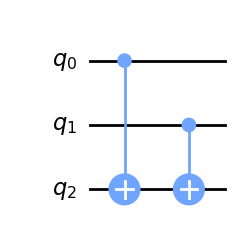

In [ ]:
# Controllo che due qubit siano diversi
qc = QuantumCircuit(3)
qc.cx(0,2)
qc.cx(1,2)
qc.draw(output="mpl")

# q2 sarà flippato solo se q0 e q1 sono diversi!

In [ ]:
clause_list = [ [0,1],
               [0,2],
               [1,3],
               [2,3] ]

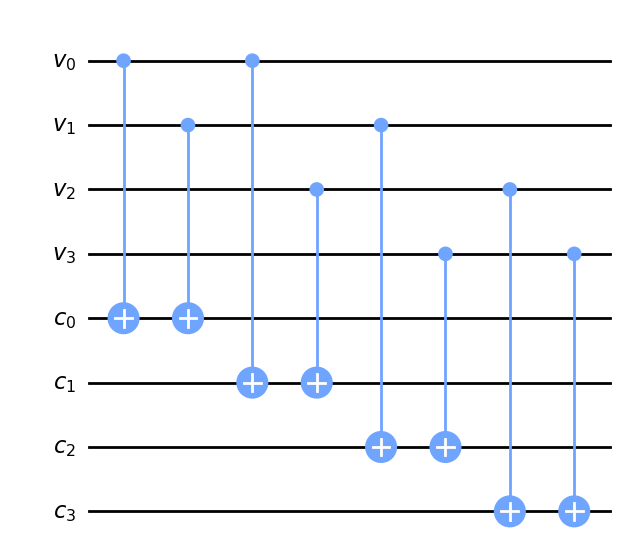

In [ ]:
# Allo stesso modo, controllo ogni clausola
var_qubits = QuantumRegister(4, name='v')  # variabili
clause_qubits = QuantumRegister(4, name='c')  # controllo clausole

qc = QuantumCircuit(var_qubits, clause_qubits)

i = 0
for clause in clause_list:
  qc.cx(clause[0], clause_qubits[i])
  qc.cx(clause[1], clause_qubits[i])
  i += 1

qc.draw(output="mpl")

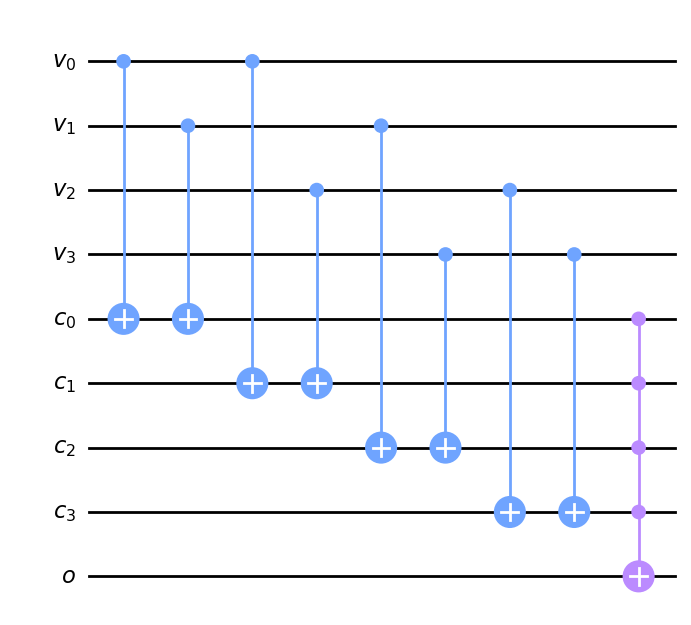

In [ ]:
# Controllo che tutti i qubit "clausola" valgano uno con un multi toffoli gate

# Allo stesso modo, controllo ogni clausola
var_qubits = QuantumRegister(4, name='v')  # variabili
clause_qubits = QuantumRegister(4, name='c')  # controllo clausole
output_qubit = QuantumRegister(1, name="o") # output totale

qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit)

i = 0
for clause in clause_list:
  qc.cx(clause[0], clause_qubits[i])
  qc.cx(clause[1], clause_qubits[i])
  i += 1

qc.mct(clause_qubits, output_qubit)

qc.draw(output="mpl")

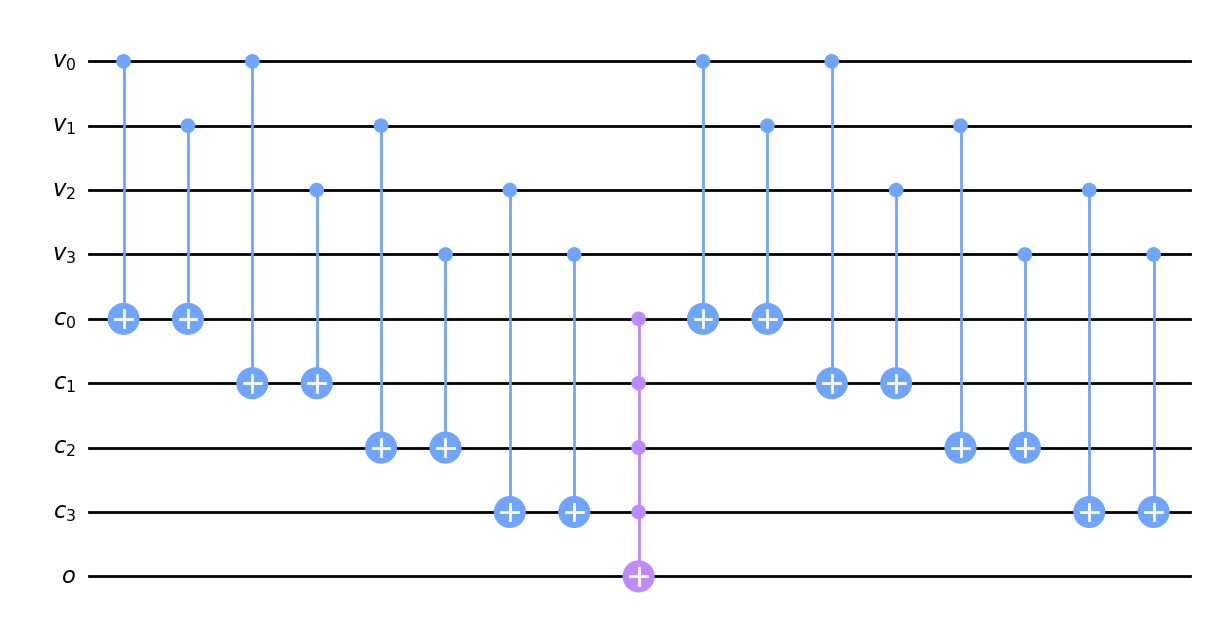

In [ ]:
# Controllo che tutti i qubit "clausola" valgano uno con un multi toffoli gate

# Allo stesso modo, controllo ogni clausola
var_qubits = QuantumRegister(4, name='v')  # variabili
clause_qubits = QuantumRegister(4, name='c')  # controllo clausole
output_qubit = QuantumRegister(1, name="o") # output totale

qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit)

i = 0
for clause in clause_list:
  qc.cx(clause[0], clause_qubits[i])
  qc.cx(clause[1], clause_qubits[i])
  i += 1

qc.mct(clause_qubits, output_qubit)

# Riapplico le clausole per resettare i clause_qubit
i = 0
for clause in clause_list:
  qc.cx(clause[0], clause_qubits[i])
  qc.cx(clause[1], clause_qubits[i])
  i += 1

qc.draw(output="mpl")

In [ ]:
def oracolo(qc):
  i = 0
  for clause in clause_list:
    qc.cx(clause[0], clause_qubits[i])
    qc.cx(clause[1], clause_qubits[i])
    i += 1

  qc.mct(clause_qubits, output_qubit)

  # Riapplico le clausole per resettare i clause_qubit
  i = 0
  for clause in clause_list:
    qc.cx(clause[0], clause_qubits[i])
    qc.cx(clause[1], clause_qubits[i])
    i += 1

  return qc

In [ ]:
def diffusore(qc, nqubits):

    # Metto s in sovrapposizione H
    for qubit in range(nqubits):
        qc.h(qubit)

    # Inverto s
    for qubit in range(nqubits):
        qc.x(qubit)

    qc.barrier()

    # Multi-controlled Z
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)
    qc.h(nqubits-1)

    qc.barrier()

    # Inverto s
    for qubit in range(nqubits):
        qc.x(qubit)

    # inverto H
    for qubit in range(nqubits):
        qc.h(qubit)

    return qc

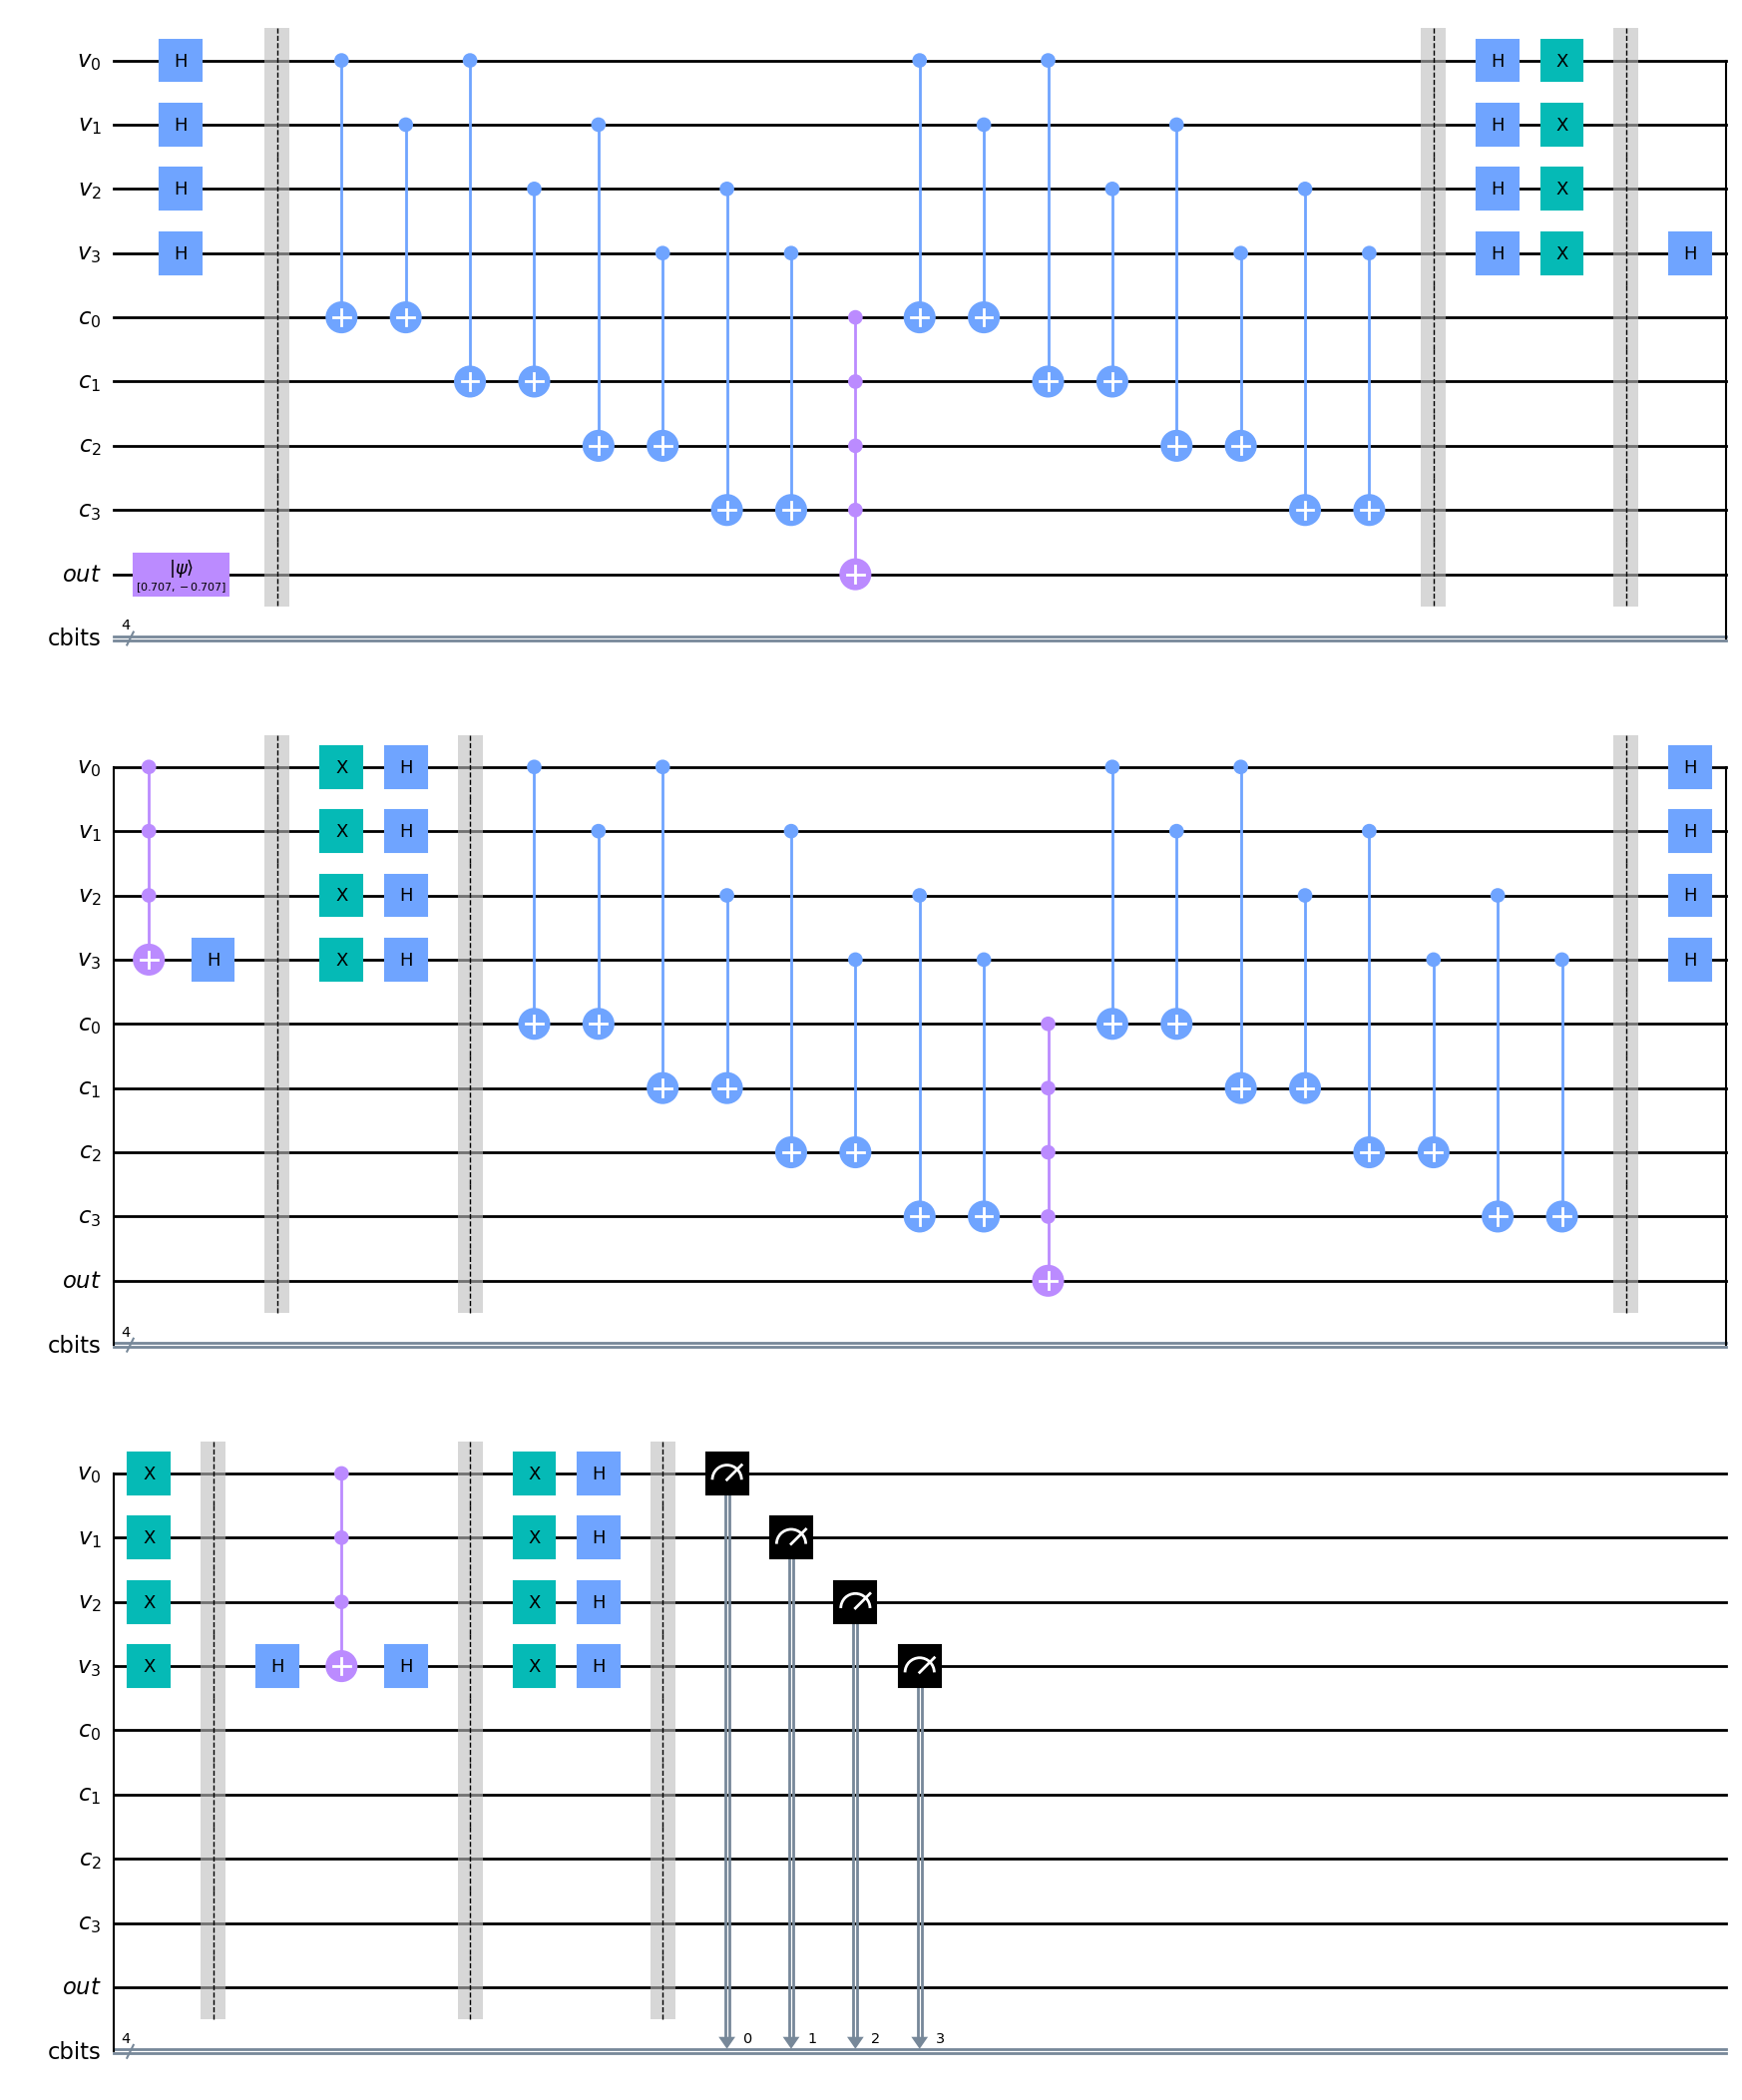

In [ ]:
## Algoritmo completo!

# Inizializzo il circuito
var_qubits = QuantumRegister(4, name='v')
clause_qubits = QuantumRegister(4, name='c')
output_qubit = QuantumRegister(1, name='out')
cbits = ClassicalRegister(4, name='cbits')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit, cbits)

# Metto 'out0' nello stato -
qc.initialize([1, -1]/np.sqrt(2), output_qubit)

# Metto i qubit di variabile nello stato H
qc.h(var_qubits)
qc.barrier()

## Prima iterazione

# Applico l'oracolo

qc = oracolo(qc)

qc.barrier()

# Applico il diffuser

qc = diffusore(qc, 4)

qc.barrier()

## Seconda iterazione

# Applico l'oracolo

qc = oracolo(qc)

qc.barrier()

# Applico il diffuser
qc = diffusore(qc, 4)

qc.barrier()

# Misuro
qc.measure(var_qubits, cbits)

qc.draw(output="mpl")

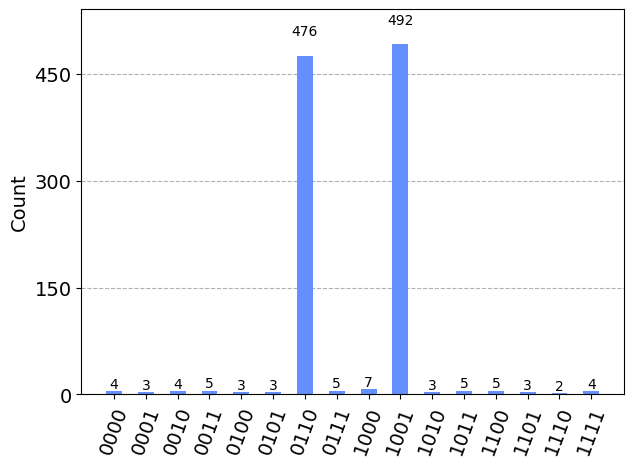

In [ ]:
# Simulate and plot results
simulator = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, simulator)
result = simulator.run(transpiled_qc).result()
plot_histogram(result.get_counts())

### Configurazioni valide

colonna 0  | colonna 1
---|---
0       | 1
1       | 0

e

colonna 0  | colonna 1
---|---
1       | 0
0       | 1